# Lecture I: Random Variables: Characterization & Description 

## Discreate events

**_Bernoulli distribution_** is a probability distribution of a random variable which takes the value $1$ with success probability of $p$ and the value $0$ with failure probability of $q=1-p$. It can be used to represent a coin toss where $1$ and $0$ would represent "head" and "tail" (or vice versa), respectively.


**_Binomial distribution_** with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. When $n = 1$, the binomial distribution is a Bernoulli distribution.

Let us see how the histogram of the Binominal distribution with $n=100, p=0.25$ looks like - by tossing the coin $N=10000$ times.

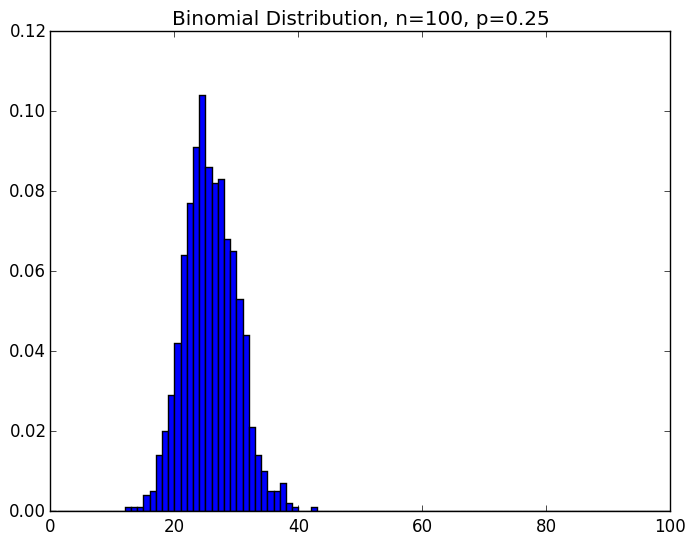

PyObject <matplotlib.text.Text object at 0x0000000024292160>

In [2]:
using PyPlot
using Distributions

function plot_histogram(distribution, n)
    epsilon_values = rand(distribution, n)  # n draws from distribution
    PyPlot.plt[:hist](epsilon_values, bins = 100, range=(0,100), normed=1)
    PyPlot.title("Binomial Distribution, n=100, p=0.25")
end

d1 = Binomial(100,0.25)
plot_histogram(d1, 1000)

In general, if the random variable $X$ follows the binomial distribution with parameters $n \in \mathbb{N}$ and $p \in [0,1]$, we write $X \sim B(n, p)$. The probability of getting exactly $k$ successes in $n$ trials is given by the **_probability mass function_**:
$$ f(k \; | \; n, p) = \Pr(X = k) = \binom n k  p^k(1-p)^{n-k} \; \text{for } k = 0, 1, 2, ..., n, $$
where $\displaystyle \binom n k =\frac{n!}{k!(n-k)!}$ is the binomial coefficient, hence the name of the distribution.

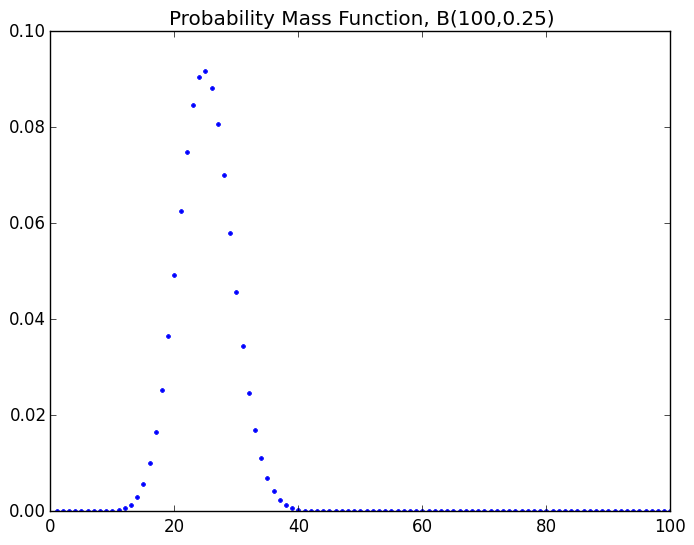

In [2]:
using PyPlot
using Distributions

x = collect(1:1:100)
d = Binomial(100,0.25)
y = pdf(d,x)

PyPlot.plot(x,y,".")
PyPlot.title("Probability Mass Function, B(100,0.25)")
PyPlot.show()

## Continuous distributions

Gaussian distribution is the most famous, and most important, distribution of a continuous variable. The probability density of the **_normal distribution_** is:
$$ f(x \; | \; \mu, \sigma) =\frac{1}{\sigma\sqrt{2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }.$$
Here, $\mu$ is the mean and $\sigma$ is the variance. A random variable sampled from  a **_Gaussian distribution_** can also be refeerred to as **_normally distributed_**.



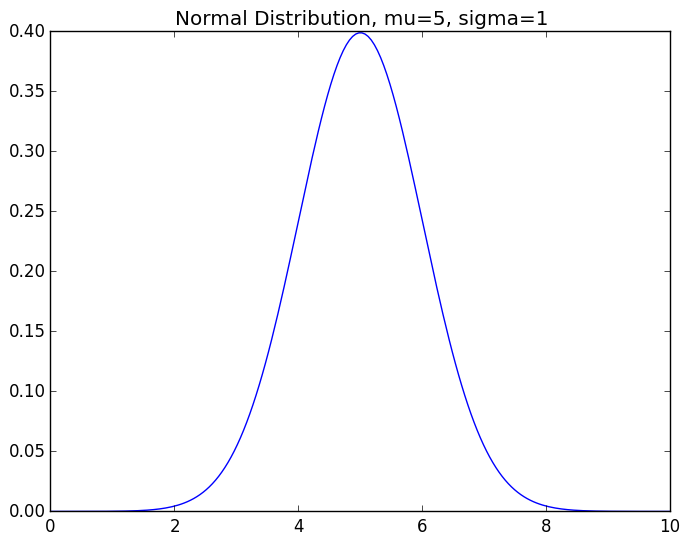

PyObject <matplotlib.text.Text object at 0x00000000277F0C50>

In [3]:
using PyPlot
using Distributions

x = linspace(0, 10, 200)
d = Normal(5,1)
y = pdf(d,x)

PyPlot.plot(x,y)
PyPlot.title("Normal Distribution, mu=5, sigma=1")

## Examples of Other Distributions

Check the list of [univariate continuous](http://distributionsjl.readthedocs.org/en/latest/univariate-continuous.html)  and [univariate discrete](http://distributionsjl.readthedocs.org/en/latest/univariate-discrete.html) distributions supported by Julia's ['Distributions'](http://distributionsjl.readthedocs.org/en/latest/index.html) package.

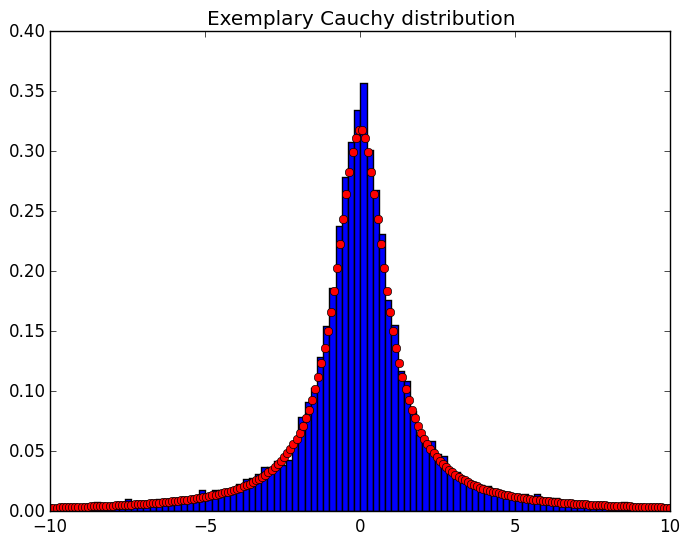

Distributions.Cauchy(μ=0.0, σ=1.0)

In [4]:
using Distributions

x = linspace(-10, 10, 200)
d=Cauchy()
y = pdf(d,x)

PyPlot.plot(x,y,"ro")
PyPlot.title("Exemplary Cauchy distribution")

samples=rand(d,10000)
PyPlot.plt[:hist](samples, bins = 100, range=(-10,10),normed=1)

d

Computing mean, variance other moments, moment generation function, etc is straightforward

In [4]:
using Distributions

d = Binomial(100,0.25)

[mean(d), var(d), skewness(d),  kurtosis(d), # mean, variance, skewness, kurtosis
    mgf(d,0.2),  # moment generation function
]

5-element Array{Float64,1}:
  25.0       
  18.75      
   0.11547   
  -0.00666667
 218.615     

Just for fun you can also play a "reconstruction/learning" game. Create samples from a distribution and try to reconstruct parameters of the distribution from the samples (think of two rooms, one where samples were created and another one where they were received and tasked to reconstruct the distribution). 

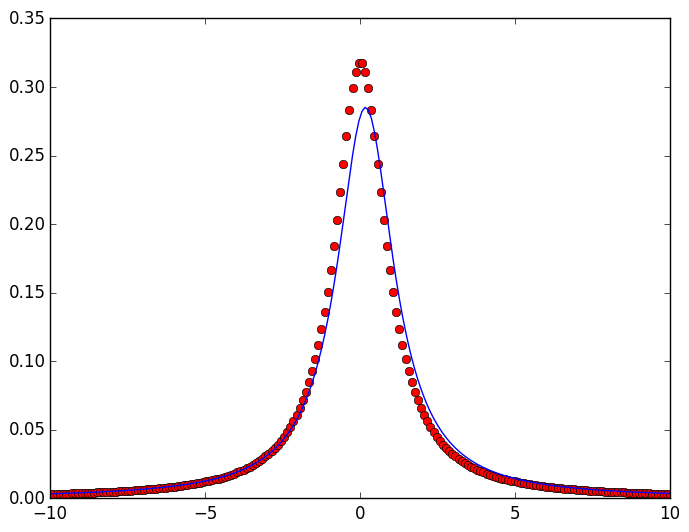

Distributions.Cauchy(μ=0.1646687124289626, σ=1.1162262396383504)

In [5]:
using Distributions

x = linspace(-10, 10, 200)
d=Cauchy()
y=pdf(d,x)
PyPlot.plot(x,y,"ro")

samples=rand(d,100)             # play with the number of samples - to see improvement
d1=fit(Cauchy,samples)
y1=pdf(d1,x)
PyPlot.plot(x,y1)
d1

# Lecture II: Random Variables: from one to many 

## Central limit theorem

The central limit theorem (CLT) states that, given certain conditions, the arithmetic mean of a sufficiently large number of  independent random variables, each with a well-defined expected value and well-defined variance, will be approaching asymptotically a normal/Gaussian distribution.

Let us consider $N$ samples, $x_i$, of the exponentially distributed random variable, $x\sim \exp(-x)$. 

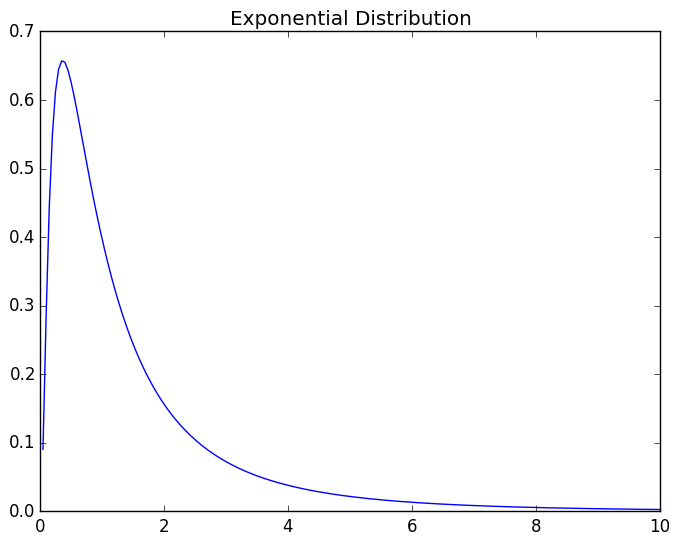

PyObject <matplotlib.text.Text object at 0x000000001A53A710>

In [44]:
using PyPlot
using Distributions

x = linspace(0, 10, 200)
#d = Exponential()
d=LogNormal()
y = pdf(d,x)

PyPlot.plot(x,y)
PyPlot.title("Exponential Distribution")

Compare distribution of the random variable $\sqrt{N}(\sum_{i=1}^{N} x_i/N-\mu)$ against the normal distribution with mean $\mu$ and variance $\sigma$.

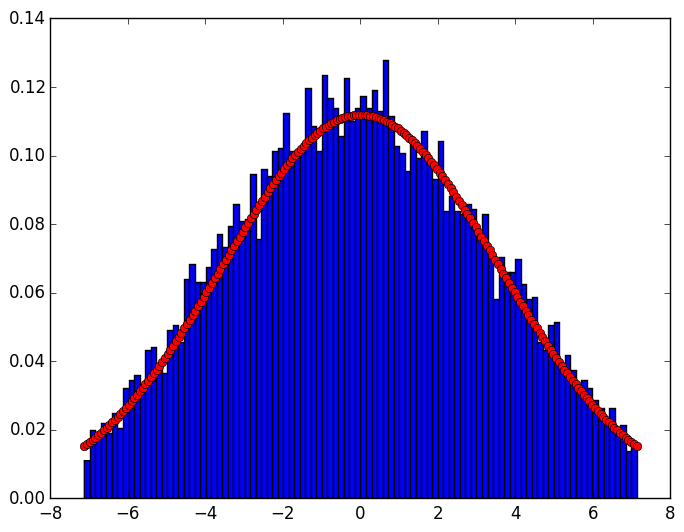

1x2 Array{Float64,2}:
 2.71828  3.56321

In [48]:
using PyPlot
using Distributions

N = 10000 # number of terms in X_N 
length = 10000 # the volume of histogram data - number of trials
xn = Array(Float64, length) # realization of random variable X_N

#d = Exponential(1) # one example of a distribution
d=LogNormal(0.5)  # another example

m=mean(d)
v=sqrt(var(d))


for i in 1:length
    x_values = rand(d, N) # generation of x_i
    xn[i] = sqrt(N)*(sum(x_values)/N-m) # \sqrt{N}(\sum_i^N x_i/N-\mu)
end

x1 = linspace(-2*v, 2*v, 200)
d1 = Normal(0,v) # d1=Normal(0,0.1)
y1 = pdf(d1,x1)

PyPlot.plt[:hist](xn, bins = 100, range=(-2*v,2*v), normed=1)
PyPlot.plot(x1,y1,"ro")
[m v]

## Conditional Probability

A good illustration of the notion of conditional probability can be found [here](http://setosa.io/ev/conditional-probability/).